# 1、训练误差和泛化误差

一般的，我们把学习器的实际预测输出与样本的真实输出之间的差异称为**误差**（error）；  
学习器在训练集上的误差称为**训练误差**（training error）或**经验误差**；  
在新样本上的误差称为**泛化误差**（generalization error）。  
计算训练误差和泛化误差可以使用之前介绍过的损失函数，例如：线性回归用到的平方损失函数和softmax回归用到的交叉熵损失函数。

在机器学习中，我们通常假设训练数据集和测试数据集里的每一个样本都是从同一个概率分布中相互独立地生成的。基于该**独立同分布**假设，给定任意一个机器学习模型（含参数），它的训练误差和泛化误差都是一样的。例如我们将模型的参数设置成随机值，那么训练误差和泛化误差会非常接近；然而模型的参数是通过在训练集上训练而学习出的（参数是依据最小化训练误差），所以，训练误差的期望小于或等于泛化误差。也就是说，一般情况下，由训练数据集学到的模型参数会使模型在训练数据集上的表现优于或等于在测试数据集上的表现。由于无法从训练误差估计泛化误差，一味地降低训练误差并不意味着泛化误差一定会降低。

# 2、模型选择

在实际任务中，我们往往有多个学习算法可供选择，甚至对于同一个学习算法使用不同的参数配置也会产生不同的学习模型。以多层感知机为例，我们可以选择隐藏层的个数，以及每个隐藏层中的隐藏单元个数和激活函数。这就是机器学习中的**模型选择**（model selection）问题。下面我们来描述模型选择中经常使用的**验证数据集**（validation set）

## 验证数据集

严格意义上讲，测试集只能在所有超参数和模型参数选定后使用一次，我们不可以使用测试数据选择模型（例如调参）。由于我们无法从训练误差估计泛化误差，因此也不应该只依赖训练数据选择模型。鉴于此，我们可以预留一部分在训练集和测试集以外的数据被称为验证集（validation set）。


## K折交叉验证

由于验证数据集不参与模型训练，当训练数据不够用时，预留大量的验证数据显得太奢侈。一个改善的方法是**$K$折交叉验证**（K-fold cross validation）。在 $K$ 折交叉验证中，我们把原始训练数据分割成 $K$ 个不重合的子数据集。然后我们将做 $K$ 次模型训练和验证。每一次，我们使用一个子数据集验证模型，并使用其他 $K-1$ 个子数据集来训练模型。最后我们对这 $K$ 次训练误差和验证误差分别求平均。
![image](./image/model_selection/k_fold_cross_validation.png)

此外，还有留出法、自助法等。

# 3、欠拟合和过拟合

**欠拟合**（underfitting）是指模型对训练样本的一般性质尚未学好，无法得到较低的训练误差；  
**过拟合**（overfitting）是指模型把训练样本学的“太好了”，很可能已经将训练样本自身的一些特点当作了所有潜在样本都会有的一般性质，导致模型的训练误差远小于测试误差。  
![image](./image/model_selection/overfitting_underfitting.png)
在实践中，我们要尽可能的同时应对欠拟合和过拟合。多种因素可能会导致这两种结果，下面我们重点讨论两个因素：  
>**1、模型复杂度**  
>**2、训练集大小**
  
其他的，**权重衰减**和**丢弃法**（dropout）下节单独介绍


### 3.1、模型复杂度

为了解释模型复杂度，我们以多项式函数拟合为例。给定一个由标量数据特征 $x$ 和对应的标量标签 $y$ 组成的训练数据集，多项式函数拟合的目标是要找一个 $K$ 阶多项式函数
$$\hat{y} = b + \sum_{k=1}^{K}(x^{k} w_{k})$$  
来近似 $y$。 上式中，$w_{k}$ 是模型的权重参数，$b$ 是偏差参数。和线性回归相同，多项式函数拟合也是用平方损失函数。特别的，以及多项式函数拟合又叫线性函数拟合。

#### 生成数据集
我们将生成一个人工数据集。在训练数据集和测试数据集中，给定样本特征 $x$，我们使用如下三阶多项式函数来生成该样本的标签：  
$$ y = 1.2x - 3.4x^{2} + 5.6x^{3} + 7 + \varepsilon $$
其中噪音项 $ \varepsilon$ 服从均值为0 和标准差为 0.1 的正态分布。训练数据集和测试数据集的样本个数都设为100。

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(10)
n_train, n_test, true_w, true_b = 100, 100, [1.2, -3.4, 5.6], [7]
# features = np.linspace(-3,3,n_train + n_test).reshape(-1,1)
features = np.random.randn(n_train+n_test,1)
poly_features = np.concatenate([features, np.power(features, 2), np.power(features, 3)],axis=1)
labels = (true_w[0] * poly_features[:,0] + true_w[1] * poly_features[:,1] \
        + true_w[2] * poly_features[:,2] + true_b).reshape(-1,1)
labels += 0.1 * np.random.randn(n_train + n_test,1)

# Training set
train_features = features[:n_train,:]
train_poly_features = poly_features[:n_train,:]
train_labels = labels[:n_train,:1]
# Test set
test_features = features[n_test:,:]
test_poly_features = poly_features[n_test:,:]
test_labels = labels[n_test:,:]

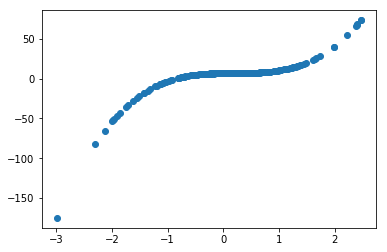

In [3]:
plt.scatter(features,labels)

#### 三阶多项式函数拟合（正常）

In [4]:
# 定义模型
num_epochs = 200
batch_size = 5

# Initialize placeholders
x = tf.placeholder(dtype=tf.float32, shape=[None,3])
y = tf.placeholder(dtype=tf.float32, shape=[None,1])


# Declare model operations
prediction = tf.layers.dense(x, 1)

# Declare loss function (L2 loss)
loss = tf.losses.mean_squared_error(y, prediction)

# Declare optimizer
optimizer = tf.train.GradientDescentOptimizer(0.05)
train_step = optimizer.minimize(loss)

# Create a graph session
sess = tf.Session()

# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

In [5]:
# 训练和测试模型
train_ls = []
test_ls = []

# Training loop
for step in range(num_epochs):
    sess.run(train_step, feed_dict={x:train_poly_features, y:train_labels})
    train_loss = sess.run(loss,feed_dict={x:train_poly_features, y:train_labels})
    test_loss = sess.run(loss, feed_dict={x:test_poly_features,y:test_labels})
    train_ls.append(train_loss)
    test_ls.append(test_loss)
    if step%20 == 0:
        print('step:',step,'|train_loss:',train_loss,'|test_loss:',test_loss)

step: 0 |train_loss: 68.66667 |test_loss: 64.78472
step: 20 |train_loss: 3.4494543 |test_loss: 4.728639
step: 40 |train_loss: 0.40909225 |test_loss: 0.712088
step: 60 |train_loss: 0.08293583 |test_loss: 0.17622949
step: 80 |train_loss: 0.03008248 |test_loss: 0.06586028
step: 100 |train_loss: 0.016009338 |test_loss: 0.03232003
step: 120 |train_loss: 0.011137765 |test_loss: 0.019720534
step: 140 |train_loss: 0.009311771 |test_loss: 0.014453672
step: 160 |train_loss: 0.008614024 |test_loss: 0.012086982
step: 180 |train_loss: 0.008346208 |test_loss: 0.010953443


In [6]:
def plot_loss(x_vals, train_loss, test_loss):
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.title('Loss Analysis')
    plt.yscale("log")
    plt.plot(x_vals, train_loss, color='red', label='train_loss')
    plt.plot(x_vals, test_loss, color='green', label='test_loss')
    plt.legend()

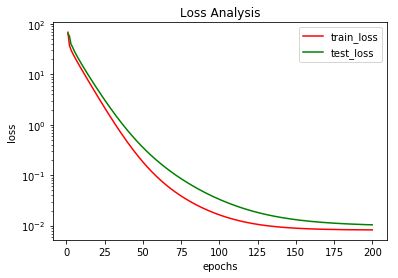

In [7]:
plot_loss(range(1,num_epochs+1),train_ls, test_ls)

In [8]:
for ele in tf.trainable_variables():
    print(sess.run(ele))

[[ 1.2252694]
 [-3.4037461]
 [ 5.5916815]]
[7.000444]


由于高阶多项式函数模型参数更多，模型函数的选择空间更大，所以高阶多项式函数比低阶多项式函数的复杂度更高。因此，高阶多项式比低阶多项式函数更容易在相同的训练数据集上得到更低的训练误差。  
给定数据集，模型复杂度和误差之间的关系通常如下图所示：  
![image](./image/model_selection/capacity_vs_error.svg)
给定数据集，如果模型的复杂度过低，很容易出现欠拟合；如果模型复杂度过高，很容易出现过拟合。针对数据集选择合适复杂度的模型。

#### 使用线性函数拟合（欠拟合）

In [9]:
# 定义模型
num_epochs = 200

# Initialize placeholders
x1 = tf.placeholder(dtype=tf.float32, shape=[None,1])
y1 = tf.placeholder(dtype=tf.float32, shape=[None,1])


# Declare model operations
prediction = tf.layers.dense(x1, 1)

# Declare loss function (L2 loss)
# loss = tf.reduce_mean(tf.square(labels - prediction))
loss = tf.losses.mean_squared_error(y1, prediction)

# Declare optimizer
optimizer = tf.train.GradientDescentOptimizer(0.05)
train_step = optimizer.minimize(loss)

# Create a graph session
sess = tf.Session()

# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

In [10]:
# 训练和测试模型
train_ls1 = []
test_ls1 = []

# Training loop
for step in range(num_epochs):
    sess.run(train_step, feed_dict={x1:train_features, y1:train_labels})
    train_loss1 = sess.run(loss,feed_dict={x1:train_features, y1:train_labels})
    test_loss1 = sess.run(loss, feed_dict={x1:test_features,y1:test_labels})
    train_ls1.append(train_loss1)
    test_ls1.append(test_loss1)
    if step%20 == 0:
        print('step:',step,'|train_loss:',train_loss1,'|test_loss:',test_loss1)

step: 0 |train_loss: 321.77524 |test_loss: 549.3486
step: 20 |train_loss: 98.91451 |test_loss: 270.16815
step: 40 |train_loss: 95.164314 |test_loss: 259.0778
step: 60 |train_loss: 95.09225 |test_loss: 257.94012
step: 80 |train_loss: 95.090706 |test_loss: 257.77924
step: 100 |train_loss: 95.090675 |test_loss: 257.75504
step: 120 |train_loss: 95.090675 |test_loss: 257.75137
step: 140 |train_loss: 95.09067 |test_loss: 257.7508
step: 160 |train_loss: 95.090675 |test_loss: 257.75073
step: 180 |train_loss: 95.090675 |test_loss: 257.75073


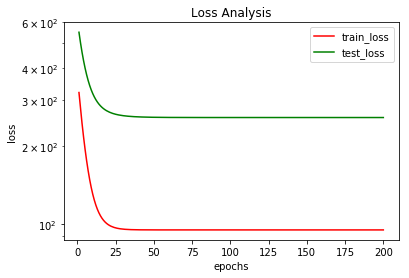

In [11]:
plot_loss(range(1,num_epochs+1),train_ls1,test_ls1)

很明显，该模型的训练误差在迭代早期下降后便很难继续降低，训练误差和测试误差都很高。线性模型在非线性模型（例如三阶多项式函数生成的数据集上容易欠拟合。

### 3.2 训练集大小

影响欠拟合和过拟合的另一个重要因素是训练数据集的大小。一般来说训练集中的样本数过少，特别是比模型参数数量（按元素计）更少时，过拟合更容易发生。此外，泛化误差不会随着训练数据集样本数量的增加而增大。因此，在计算资源允许的范围内，我们通常希望训练数据集大一些，特别当模型复杂度较高时（例如层数较多的深度学习模型）。

#### 训练数据不足时（过拟合）

In [12]:
# 定义模型
num_epochs = 200
batch_size = 5

# Initialize placeholders
x = tf.placeholder(dtype=tf.float32, shape=[None,3])
y = tf.placeholder(dtype=tf.float32, shape=[None,1])


# Declare model operations
prediction = tf.layers.dense(x, 1)

# Declare loss function (L2 loss)
loss = tf.losses.mean_squared_error(y, prediction)

# Declare optimizer
optimizer = tf.train.GradientDescentOptimizer(0.05)
train_step = optimizer.minimize(loss)

# Create a graph session
sess = tf.Session()

# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

In [13]:
# 只选取两个样本点训练模型
train_set = train_poly_features[0:2,:]
train_labels = train_labels[0:2,:]

# 训练和测试模型
train_ls = []
test_ls = []

# Training loop
for step in range(num_epochs):
    sess.run(train_step, feed_dict={x:train_set, y:train_labels})
    train_loss = sess.run(loss,feed_dict={x:train_set, y:train_labels})
    test_loss = sess.run(loss, feed_dict={x:test_poly_features,y:test_labels})
    train_ls.append(train_loss)
    test_ls.append(test_loss)
    if step%20 == 0:
        print('step:',step,'|train_loss:',train_loss,'|test_loss:',test_loss)

step: 0 |train_loss: 30.656075 |test_loss: 209.32657
step: 20 |train_loss: 1.1020666 |test_loss: 160.34149
step: 40 |train_loss: 0.3059143 |test_loss: 197.46213
step: 60 |train_loss: 0.08491639 |test_loss: 219.57208
step: 80 |train_loss: 0.023571301 |test_loss: 231.92953
step: 100 |train_loss: 0.0065430654 |test_loss: 238.63686
step: 120 |train_loss: 0.0018162302 |test_loss: 242.22528
step: 140 |train_loss: 0.00050413056 |test_loss: 244.13101
step: 160 |train_loss: 0.00013993739 |test_loss: 245.13931
step: 180 |train_loss: 3.8840226e-05 |test_loss: 245.67168


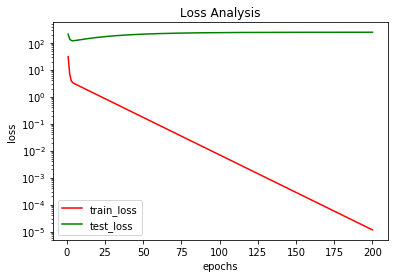

In [14]:
plot_loss(range(1,num_epochs+1),train_ls, test_ls)

事实上，即便使用与真实数据分布同阶的三阶多项式函数模型，如果训练量不足，该模型依然容易产生过拟合。显然训练样本过少了，以至于模型很容易受到训练数据中噪音的影响。在迭代的过程中，即便训练误差很低，但测试集上的误差却很高，典型的过拟合现象。

# 小结

1. 由于无法从训练误差估计泛化误差，一味地降低训练误差并不意味着泛化误差一定会降低。机器学习模型更应关注降低泛化误差 
2. 我们可以使用验证数据集来进行模型选择
3. 欠拟合指模型无法得到较低的训练误差；过拟合是指模型的训练误差远小于它在测试数据集上的误差。
